In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

In [3]:
dataf = pd.read_csv('merged_data_polymer.csv')

In [4]:
X = dataf[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
# dataf['E']=dataf['E']*10
# dataf['mu']= dataf['mu']*10000

Y = dataf[['E', 'mu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(2))  # Output layer with 2 neurons for E and mu
from keras.optimizers import Adam

# Create an instance of the Adam optimizer with a specified learning rate
adam_optimizer = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.1)

C:\Users\Ayush Rai\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 0.7390 - val_loss: 0.3325
Epoch 2/1000
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.2544 - val_loss: 0.2144
Epoch 3/1000
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.2324 - val_loss: 0.2099
Epoch 4/1000
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.2240 - val_loss: 0.2135
Epoch 5/1000
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.2159 - val_loss: 0.2106
Epoch 6/1000
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.2113 - val_loss: 0.1921
Epoch 7/1000
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 0.2080 - val_loss: 0.2012
Epoch 8/1000
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.2045 - val_loss: 0.2013
Epoch 9/1000
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.1996 - val_loss: 0.2074
Epoch 10/1000
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.1953 - val_loss: 0.2015
Epoch 11/1000
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 0.1939 - val_loss: 0.18

In [21]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
# results_df['Actual_mu'] /= 10000
# results_df['Predicted_mu'] /= 10000
# results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
Mean Squared Error for E: 0.3484853701692521
Mean Squared Error for mu: 0.001193332863827145
Median Percentage Error for E: 9.386496811712316
Median Percentage Error for mu: 6.259956710153059
Mean Absolute Error for E: 0.41131283173103117
Mean Absolute Error for mu: 0.028291799686588133
Standard Deviation for E: 0.42356638836059485
Standard Deviation for mu: 0.01982748196630153
Mode Percentage Error for E: ModeResult(mode=2.0047053591120636, count=2) 
Mode Percentage Error for E: ModeResult(mode=3.981698615641529, count=3) 
Mean Absolute percentage Error for E: 12.288843141870474
Mean Absolute percentage Error for mu: 6.739181139704233
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu  Error_mu  \
0        2.974     2.840144  0.133856      0.382      0.401824  0.019824   
1        6.177     5.942875  0.234125      0.399      0.407930  0.008930   
2        7.175     7.048105  0.126895      0.394      0.404992  0.010992   
3        0.

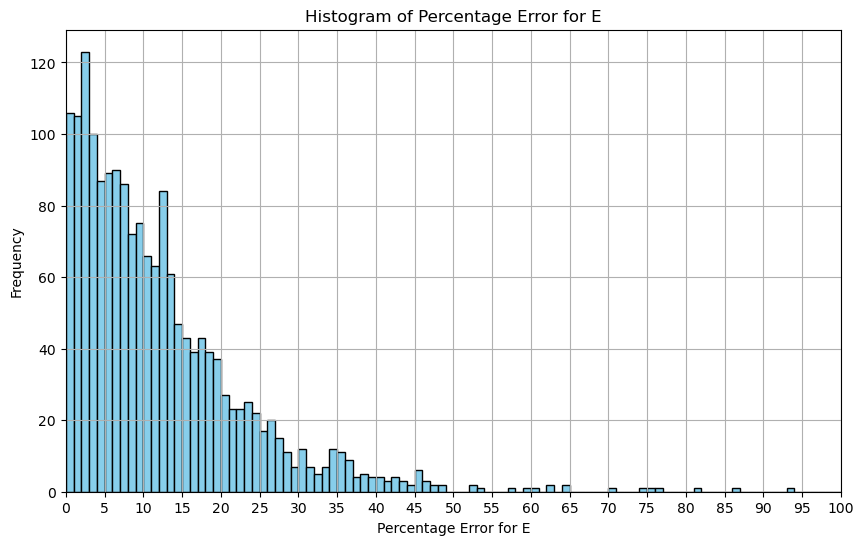

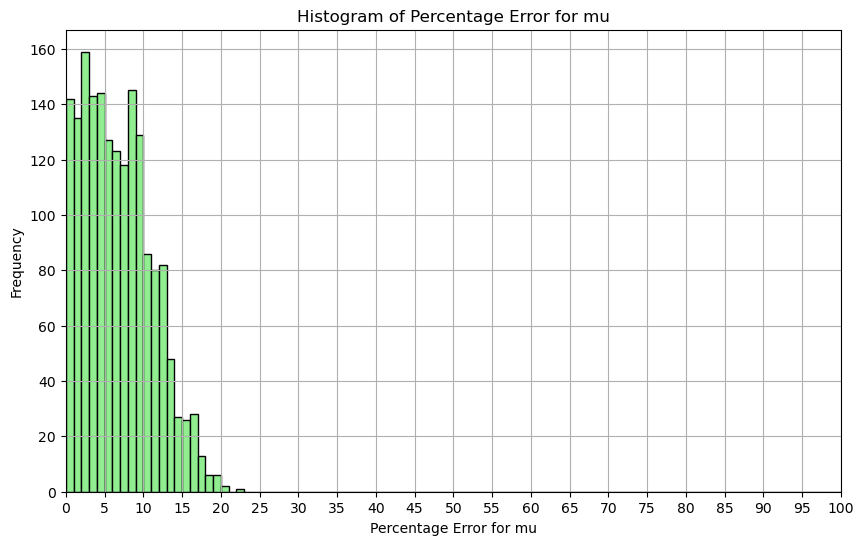

Maximum Percentage Error for E: 133.14103688279243
Minimum Percentage Error for E: 0.004507823708203502
Maximum Percentage Error for mu: 22.38499072133278
Minimum Percentage Error for mu: 0.009014557317363135


In [22]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101,5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [23]:
import pickle

In [24]:
model_file_pickle = "polymerss_ANN_model_no_scale.pkl"
with open(model_file_pickle, 'wb') as file:
    pickle.dump(model, file)

In [25]:
with open(model_file_pickle, 'rb') as file:
    model1 = pickle.load(file)

In [26]:
y_pred_loaded_pickle = model1.predict(X_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [27]:
y_pred_loaded_pickle

array([[2.840144  , 0.40182376],
       [5.942875  , 0.4079295 ],
       [7.048105  , 0.40499225],
       ...,
       [5.459547  , 0.409214  ],
       [1.7355881 , 0.39271158],
       [3.846583  , 0.40724453]], dtype=float32)